In [1]:
import warnings;
warnings.filterwarnings('ignore');
import os
os.environ["DISABLE_MPI"]="1"
os.environ["OMP_NUM_THREADS"]="3"

In [2]:
!echo $PYTHONPATH

/opt/ovis/lib/python2.7/site-packages


In [3]:
import numpy as np
from pixell import enmap, utils, enplot, colorize, reproject
import glob as gl
import pylab as plt
import healpy as hp

In [44]:
cmap = colorize.schemes["planck"].reverse()

In [4]:
release_path = '/global/cfs/projectdirs/act/data/20191125_actpol_dr4/'

In [20]:
dust = enmap.read_map("data/planck_353_small.fits")
footprint2 = enmap.zeros(dust.shape[1:],dust.wcs)
del dust

In [24]:
paths = gl.glob(release_path+'/maps/s16/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 1


paths = gl.glob(release_path+'/maps/s15/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 1
        
    
paths = gl.glob(release_path+'/maps/s13/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 1

  4.66   0.01 read 
  4.66   0.05 ranges
  4.66 color range 0:  2.00000e+00 to   5.0000000e+00
  4.66   0.03 1/1 colorize
  4.66   0.00 1/1 to image
  4.66   0.00 1/1 stack layers
  4.66 padded by 0 0 0 0


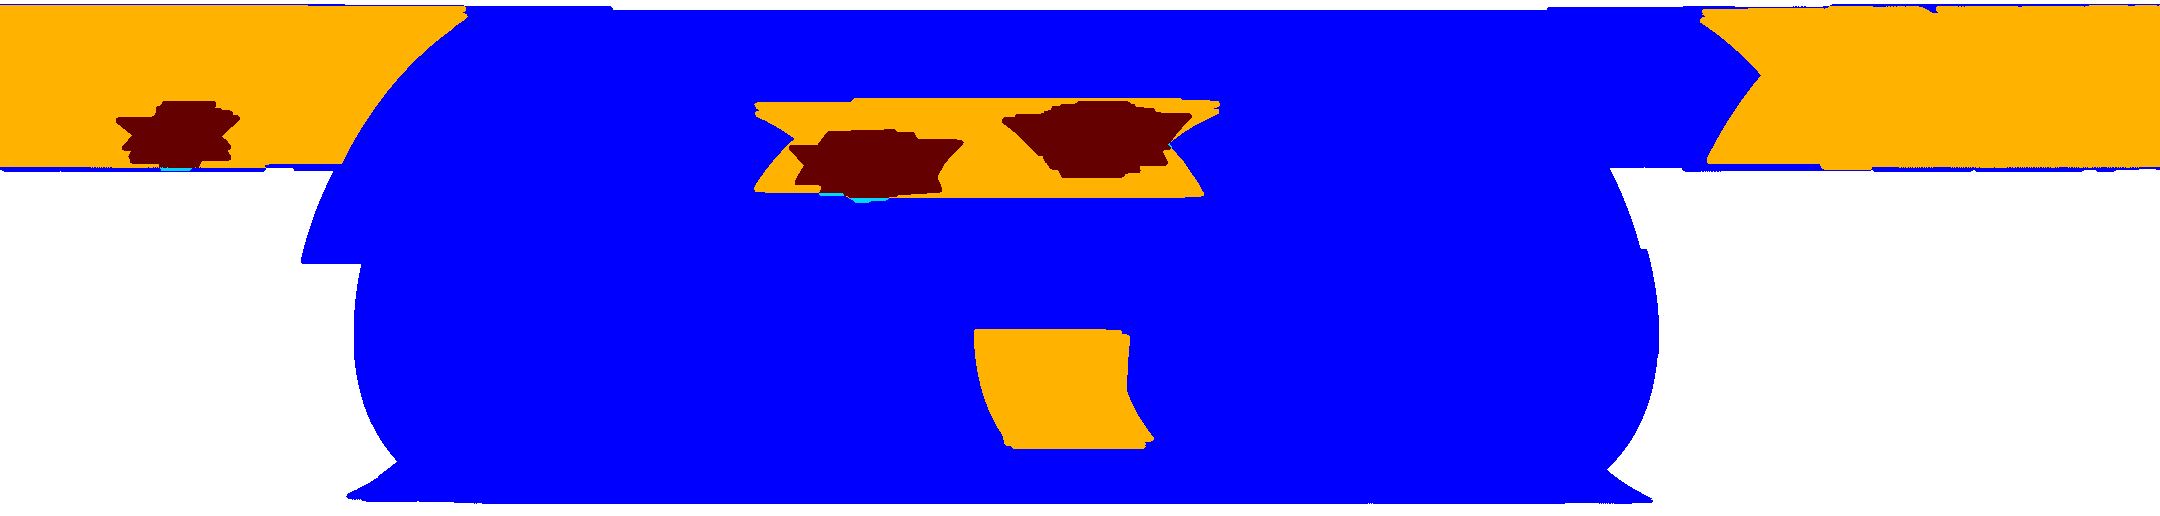

In [64]:
pl = enplot.plot(footprint2,mask=0,grid=False,verbosity=10)
enplot.show(pl)

In [132]:
maskhp = footprint2.to_healpix(nside=512, order=0)

In [133]:
maskhp[maskhp==0]=hp.UNSEEN

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


Text(-0.21384290836414835, -0.2720147302681235, 'AA')

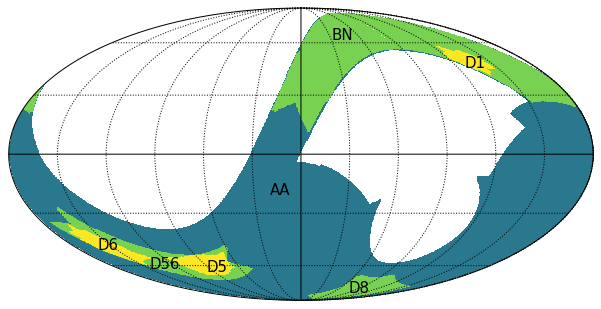

In [141]:
hp.mollview(maskhp,title='',cbar=False,coord=['E','G'],cmap=cmap,min=0,max=5,badcolor='white',notext=True,xsize=1500)
hp.graticule()
hp.projtext(-30., 62., 'BN', lonlat=True, coord='G',size=15,color="black")
hp.projtext(-125., 45., 'D1', lonlat=True, coord='G',size=15,color="black")
hp.projtext(-90., -80, 'D8', lonlat=True, coord='G',size=15,color="black")
hp.projtext(165., -50, 'D6', lonlat=True, coord='G',size=15,color="black")
hp.projtext(98., -64, 'D5', lonlat=True, coord='G',size=15,color="black")
hp.projtext(150., -62, 'D56', lonlat=True, coord='G',size=15,color="black")
hp.projtext(20., -20, 'AA', lonlat=True, coord='G',size=15,color="black")